In [45]:
#병원 Decision tree
import pandas as pd
hospital_data = pd.read_csv('train.csv')
hospital_data = hospital_data.dropna()
hospital_data

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same
5,11,open,gyeongnam,155,20020501,243.0,general_hospital,3.358054e+10,9.222997e+09,2.372791e+10,...,0.000000e+00,2.186113e+10,1.708714e+10,2.000000e+07,0.000000e+00,0.000000e+00,5.879004e+09,397.0,390.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,417,open,gyeonggi,169,20020401,306.0,general_hospital,1.000000e+11,2.647023e+10,6.427413e+10,...,4.912228e+10,8.952459e+09,0.000000e+00,4.016982e+10,1.216840e+09,3.309314e+10,4.915000e+08,807.0,583.0,same
293,418,open,gyeonggi,170,20120312,109.0,hospital,4.303270e+09,2.423876e+08,3.455912e+09,...,5.062574e+09,3.092828e+09,0.000000e+00,1.969747e+09,1.925500e+09,2.637783e+09,0.000000e+00,75.0,70.0,same
294,419,open,gyeongnam,174,20101104,367.0,nursing_hospital,1.207963e+10,5.309241e+08,9.521440e+09,...,7.191291e+09,1.101291e+09,2.813239e+08,6.090000e+09,5.890000e+09,9.065227e+09,0.000000e+00,180.0,180.0,same
295,420,open,gyeonggi,177,20110523,0.0,nursing_hospital,5.500472e+09,0.000000e+00,4.883855e+09,...,3.945343e+09,7.113988e+08,0.000000e+00,3.233945e+09,1.800000e+09,4.337819e+09,0.000000e+00,62.0,66.0,same


In [46]:
#Decision Tree는 숫자가 저장되어있어야됨
#close를 0, open를 1으로 바꿈
hospital_data.OC.replace(' close',0,inplace=True)
hospital_data.OC.replace('open',1,inplace=True)
hospital_data.OC

0      1
2      1
3      1
4      1
5      1
      ..
292    1
293    1
294    1
295    1
296    1
Name: OC, Length: 277, dtype: int64

In [47]:
hospital_data.instkind

0      nursing_hospital
2      nursing_hospital
3      general_hospital
4      general_hospital
5      general_hospital
             ...       
292    general_hospital
293            hospital
294    nursing_hospital
295    nursing_hospital
296    nursing_hospital
Name: instkind, Length: 277, dtype: object

In [48]:
hospital_data.instkind.replace('nursing_hospital',0,inplace=True)
hospital_data.instkind.replace('general_hospital',1,inplace=True)
hospital_data.instkind.replace('traditional_hospital',2,inplace=True)
hospital_data.instkind.replace('hospital',3,inplace=True)
hospital_data.instkind.replace('clinic',4,inplace=True)
hospital_data.instkind.replace('traditional_clinic',5,inplace=True)
hospital_data.instkind.replace('dental_clinic',6,inplace=True)
hospital_data.instkind.replace('nan',7,inplace=True)

In [49]:
hospital_data.instkind

0      0
2      0
3      1
4      1
5      1
      ..
292    1
293    3
294    0
295    0
296    0
Name: instkind, Length: 277, dtype: int64

In [50]:
import numpy as np
X=np.array(pd.DataFrame(hospital_data,columns=['instkind','revenue1','profit1']))
y=np.array(pd.DataFrame(hospital_data,columns=['OC']))

In [72]:
# ----------------------------------------
# train데이터 split해서 decision tree만들어봄
# test데이터로 다시 실험할 것

In [51]:
from sklearn.model_selection import train_test_split
train_test_split(X,y,test_size=0.2)

[array([[ 0.00000000e+00,  7.61469654e+09,  5.94386811e+08],
        [ 0.00000000e+00,  4.63182234e+09,  6.43856390e+07],
        [ 1.00000000e+00,  2.37576373e+09, -2.48331060e+09],
        [ 0.00000000e+00,  7.06749830e+09,  2.20128400e+06],
        [ 1.00000000e+00,  3.99984914e+10, -1.38721736e+09],
        [ 3.00000000e+00,  2.15600535e+10,  6.46925416e+08],
        [ 1.00000000e+00,  1.00000000e+11,  7.47542688e+09],
        [ 5.00000000e+00,  5.96181152e+09,  1.42413101e+08],
        [ 0.00000000e+00,  2.12378555e+09, -1.40684869e+09],
        [ 0.00000000e+00,  6.01754349e+09,  2.64596621e+08],
        [ 1.00000000e+00,  3.72438282e+10, -3.13676215e+08],
        [ 0.00000000e+00,  5.77393262e+09,  0.00000000e+00],
        [ 3.00000000e+00,  5.82014504e+10,  8.77397273e+08],
        [ 0.00000000e+00,  3.60324461e+09,  2.13502997e+08],
        [ 0.00000000e+00,  2.99849588e+09,  1.75568000e+06],
        [ 0.00000000e+00,  3.91230831e+09,  1.11763820e+07],
        [ 0.00000000e+00

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
dt_prediction = dt_clf.predict(X_test)

In [55]:
dt_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [56]:
y_test

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,dt_prediction)
print("정확도:",accuracy)

정확도: 0.9464285714285714


In [73]:
# ---------------------------------------------------
# test데이터 불러와 decision tree 돌려보기

In [58]:
from sklearn import tree

In [59]:
#Decision Tree 내용 Text(Dot형식) 출력
dt_dot_data=tree.export_graphviz(
                    dt_clf,
                    #독립변수칸이름 순서대로
                    feature_names = ['instkind','revenue1','profit1'],
                    #종속변수의 값[0,1] -> [no,yes]
                    class_names = [" close","open"]
)

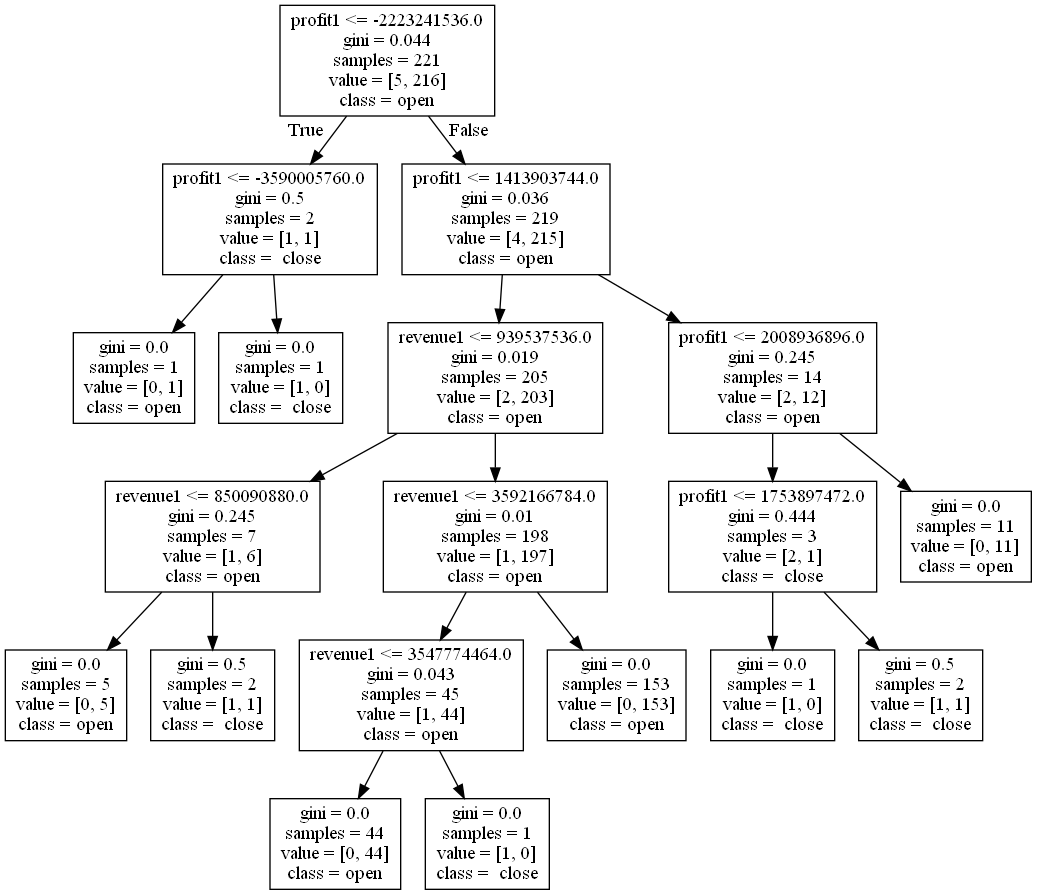

In [60]:
import pydotplus
data = pydotplus.graph_from_dot_data(dt_dot_data).create_png()
from io import BytesIO
from PIL import Image
Image.open(BytesIO(data))

In [61]:
import pandas as pd
test_data = pd.read_csv('test.csv')
test_data = hospital_data.dropna()
test_data

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,1,choongnam,73,20071228,175.0,0,4.217530e+09,0.000000e+00,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
2,4,1,gyeonggi,89,20161228,468.0,0,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,1,incheon,141,20000814,353.0,1,7.250734e+10,0.000000e+00,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,1,gyeongnam,32,20050901,196.0,1,4.904354e+10,0.000000e+00,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same
5,11,1,gyeongnam,155,20020501,243.0,1,3.358054e+10,9.222997e+09,2.372791e+10,...,0.000000e+00,2.186113e+10,1.708714e+10,2.000000e+07,0.000000e+00,0.000000e+00,5.879004e+09,397.0,390.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,417,1,gyeonggi,169,20020401,306.0,1,1.000000e+11,2.647023e+10,6.427413e+10,...,4.912228e+10,8.952459e+09,0.000000e+00,4.016982e+10,1.216840e+09,3.309314e+10,4.915000e+08,807.0,583.0,same
293,418,1,gyeonggi,170,20120312,109.0,3,4.303270e+09,2.423876e+08,3.455912e+09,...,5.062574e+09,3.092828e+09,0.000000e+00,1.969747e+09,1.925500e+09,2.637783e+09,0.000000e+00,75.0,70.0,same
294,419,1,gyeongnam,174,20101104,367.0,0,1.207963e+10,5.309241e+08,9.521440e+09,...,7.191291e+09,1.101291e+09,2.813239e+08,6.090000e+09,5.890000e+09,9.065227e+09,0.000000e+00,180.0,180.0,same
295,420,1,gyeonggi,177,20110523,0.0,0,5.500472e+09,0.000000e+00,4.883855e+09,...,3.945343e+09,7.113988e+08,0.000000e+00,3.233945e+09,1.800000e+09,4.337819e+09,0.000000e+00,62.0,66.0,same


In [63]:
#Decision Tree는 숫자가 저장되어있어야됨
#close를 0, open를 1으로 바꿈
test_data.OC.replace(' close',0,inplace=True)
test_data.OC.replace('open',1,inplace=True)
test_data.OC

0      1
2      1
3      1
4      1
5      1
      ..
292    1
293    1
294    1
295    1
296    1
Name: OC, Length: 277, dtype: int64

In [64]:
test_data.instkind.replace('nursing_hospital',0,inplace=True)
test_data.instkind.replace('general_hospital',1,inplace=True)
test_data.instkind.replace('traditional_hospital',2,inplace=True)
test_data.instkind.replace('hospital',3,inplace=True)
test_data.instkind.replace('clinic',4,inplace=True)
test_data.instkind.replace('traditional_clinic',5,inplace=True)
test_data.instkind.replace('dental_clinic',6,inplace=True)
test_data.instkind.replace('nan',7,inplace=True)

In [65]:
import numpy as np
test_X=np.array(pd.DataFrame(test_data,columns=['instkind','revenue1','profit1']))
test_y=np.array(pd.DataFrame(test_data,columns=['OC']))

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X,y)

DecisionTreeClassifier()

In [67]:
dt_prediction = dt_clf.predict(test_X)

In [68]:
dt_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [69]:
test_y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [71]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y,dt_prediction)
print("정확도:",accuracy)

정확도: 0.9927797833935018
